## matplotlib - Figuras 2D y 3D en Python

J.R. Johansson (jrjohansson@gmail.com)

La versión más reciente de este trabajo [IPython notebook](http://ipython.org/notebook.html) está disponible en [GitHub](http://github.com/jrjohansson/scientific-python-lectures).

Los otros cuadernos de esta serie de conferencias están indexados en [http://jrjohansson.github.io](http://jrjohansson.github.io).

In [1]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
# If you are using an old version of IPython, try using '%pylab inline' instead.
%matplotlib inline

### Introducción

Matplotlib es una excelente biblioteca de gráficos 2D y 3D para generar figuras científicas. Algunas de las muchas ventajas de esta biblioteca incluyen:

*Fácil de empezar* Soporte para etiquetas y textos formateados $\LaTeX$
*Gran control de cada elemento de una figura, incluidos el tamaño de la figura y el DPI.* Salida de alta calidad en muchos formatos, incluidos PNG, PDF, SVG, EPS y PGF.
*GUI para explorar de forma interactiva las cifras* y <*> para la generación sin cabeza de archivos de figuras (útil para trabajos por lotes).

Una de las características clave de matplotlib que me gustaría enfatizar, y que creo que hace que matplotlib sea muy adecuado para generar figuras para publicaciones científicas, es que todos los aspectos de la figura pueden controlarse mediante programación*. Esto es importante para la reproducibilidad y es conveniente cuando se necesita regenerar la figura con datos actualizados o cambiar su apariencia.

Más información en la página web de Matplotlib: http://matplotlib.org/

Para comenzar a utilizar Matplotlib en un programa de Python, incluya los símbolos del módulo `pylab` (de manera sencilla):

In [2]:
import matplotlib
import matplotlib.pyplot as plt

In [3]:
import numpy as np

### API similar a MATLAB

La forma más fácil de comenzar con el trazado de matplotlib es usar la API similar a MATLAB proporcionada por matplotlib.

Está diseñado para ser compatible con las funciones de trazado de MATLAB, por lo que es fácil comenzar si está familiarizado con MATLAB.

Para usar esta API de matplotlib, necesitamos incluir los símbolos en el módulo `pylab`:

In [4]:
from pylab import *

#### Ejemplo

Una figura simple con la API de trazado de MATLAB:

In [5]:
x = np.linspace(0, 5, 10)
y = x ** 2

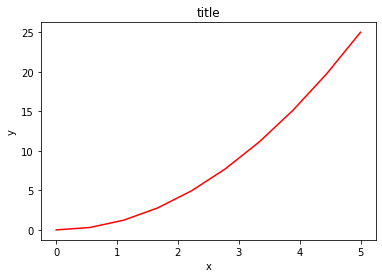

In [6]:
figure()
plot(x, y, 'r')
xlabel('x')
ylabel('y')
title('title')
show()

La mayoría de las funciones relacionadas con el trazado en MATLAB están cubiertas por el módulo `pylab`. Por ejemplo, subplot y selección de color / símbolo:

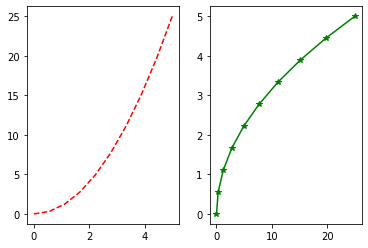

In [7]:
subplot(1,2,1)
plot(x, y, 'r--')
subplot(1,2,2)
plot(y, x, 'g*-');

Lo bueno de la API de estilo MATLAB de Pylab es que es fácil comenzar si está familiarizado con MATLAB, y tiene un mínimo de sobrecarga de codificación para diagramas simples.

Sin embargo, recomendaría no usar la API compatible con MATLAB para nada más que las cifras más simples.

En su lugar, recomiendo aprender y usar la API de trazado orientado a objetos de matplotlib. Es notablemente poderoso. Para figuras avanzadas con subparcelas, inserciones y otros componentes, es muy agradable trabajar con ellos.

### La API orientada a objetos matplotlib

La idea principal de la programación orientada a objetos es tener objetos en los que se puedan aplicar funciones y acciones, y ningún estado de objeto o programa debe ser global (como la API similar a MATLAB). La ventaja real de este enfoque se hace evidente cuando se crea más de una figura, o cuando una figura contiene más de un argumento secundario.

Para utilizar la API orientada a objetos, comenzamos como en el ejemplo anterior, pero en lugar de crear una nueva instancia de figura global, almacenamos una referencia a la instancia de figura recién creada en la variable `fig`, y a partir de ella creamos una new axis instance `axes` usando el método` add_axes` en la instancia de la clase `Figure`` fig`:

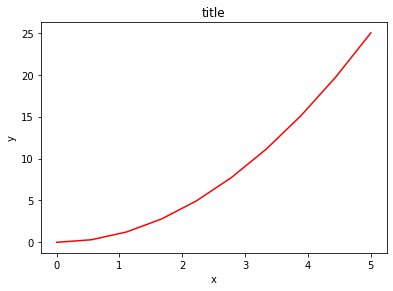

In [8]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.plot(x, y, 'r')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

Aunque está involucrado un poco más de código, la ventaja es que ahora tenemos el control total de dónde se colocan los ejes de trazado, y podemos agregar fácilmente más de un eje a la figura:

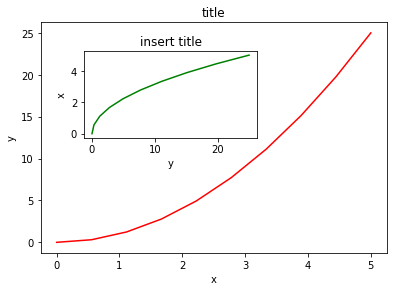

In [9]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# insert
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title');

Si no nos importa ser explícitos acerca de dónde se ubican nuestros ejes de trazado en el lienzo de la figura, entonces podemos usar uno de los muchos administradores de diseño de ejes en matplotlib. Mi favorito es `subplots`, que se puede usar así:

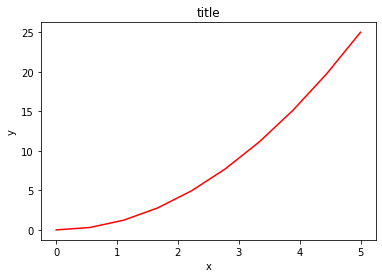

In [10]:
fig, axes = plt.subplots()

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

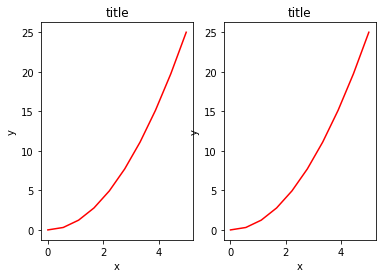

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

Eso fue fácil, pero no es tan bonito con hachas y etiquetas de figuras superpuestas, ¿verdad?

Podemos lidiar con eso usando el método `fig.tight_layout`, que ajusta automáticamente las posiciones de los ejes en el lienzo de la figura para que no haya contenido superpuesto:

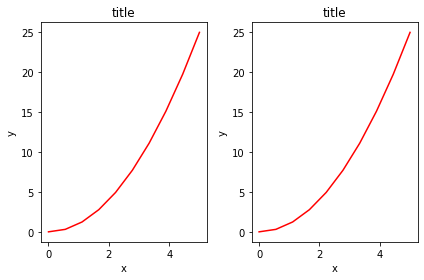

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
    
fig.tight_layout()

#### Tamaño de la figura, relación de aspecto y DPI

Matplotlib permite especificar la relación de aspecto, el DPI y el tamaño de la figura cuando se crea el objeto `Figure`, utilizando los argumentos de las palabras clave` figsize` y `dpi`. `figsize` es una tupla del ancho y alto de la figura en pulgadas, y` dpi` es el punto por pulgada (píxel por pulgada). Para crear una figura de 800x400 píxeles, 100 puntos por pulgada, podemos hacer:

In [13]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

Los mismos argumentos también se pueden pasar a los gestores de diseño, como la función `subplots`:

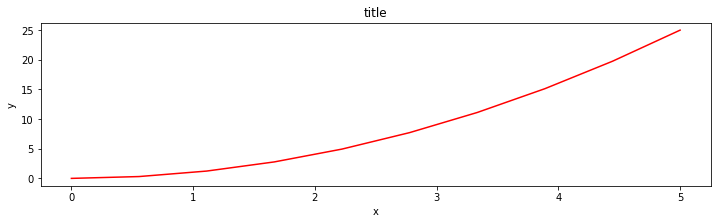

In [14]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

#### Guardando figuras

Para guardar una figura en un archivo, podemos utilizar el método `savefig` en la clase` Figure`:

In [15]:
fig.savefig("filename.png")

Aquí también podemos especificar opcionalmente el DPI y elegir entre diferentes formatos de salida:

In [16]:
fig.savefig("filename.png", dpi=200)

**¿Qué formatos están disponibles y cuáles deben usarse para obtener la mejor calidad?**

Matplotlib puede generar resultados de alta calidad en varios formatos, incluidos PNG, JPG, EPS, SVG, PGF y PDF. Para artículos científicos, recomiendo usar PDF siempre que sea posible. (Los documentos LaTeX compilados con `pdflatex` pueden incluir archivos PDF usando el comando` includegraphics`). En algunos casos, PGF también puede ser una buena alternativa.

#### Leyendas, etiquetas y títulos.

Ahora que hemos cubierto los conceptos básicos de cómo crear un lienzo de figura y agregar instancias de ejes al lienzo, veamos cómo decorar una figura con títulos, etiquetas de ejes y leyendas.

**Títulos de las figuras**

Se puede agregar un título a cada instancia de eje en una figura. Para establecer el título, use el método `set_title` en la instancia de los ejes:

In [17]:
ax.set_title("title");

**Etiquetas del eje**

De manera similar, con los métodos `set _xlabel` y` set_ ylabel`, podemos establecer las etiquetas de los ejes X e Y:

In [ ]:
ax.set_xlabel("x")
ax.set_ylabel("y");

**Leyendas**

Las leyendas para las curvas en una figura se pueden agregar de dos maneras. Un método es usar el método `legend` del objeto de eje y pasar una lista / tupla de textos de leyenda para las curvas definidas previamente:

In [ ]:
ax.legend(["curve1", "curve2", "curve3"]);

El método descrito anteriormente sigue la API de MATLAB. Es algo propenso a errores y no es flexible si se agregan o eliminan curvas de la figura (lo que resulta en una curva mal etiquetada).

Un método mejor es usar el argumento de la palabra clave `label =" label text "` cuando se agregan parcelas u otros objetos a la figura, y luego usar el método `legend` sin argumentos para agregar la leyenda a la figura:

In [ ]:
ax.plot(x, x**2, label="curve1")
ax.plot(x, x**3, label="curve2")
ax.legend();

La ventaja de este método es que si se agregan o eliminan curvas de la figura, la leyenda se actualiza automáticamente en consecuencia.

La función `legend` toma un argumento de palabra clave opcional` loc` que se puede usar para especificar dónde se dibujará la leyenda en la figura. Los valores permitidos de `loc` son códigos numéricos para los distintos lugares donde se puede dibujar la leyenda. Consulte http://matplotlib.org/users/legend_guide.html#legend-location para obtener más información. Algunos de los valores más comunes de `loc` son:

In [ ]:
ax.legend(loc=0) # let matplotlib decide the optimal location
ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner
# .. many more options are available

La siguiente figura muestra cómo usar el título de la figura, las etiquetas de los ejes y las leyendas descritas anteriormente:

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.legend(loc=2); # upper left corner
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title');

#### Texto de formato: LaTeX, tamaño de fuente, familia de fuentes

La figura anterior es funcional, pero (aún) no cumple los criterios de una figura utilizada en una publicación. Primero y ante todo, necesitamos tener texto con formato LaTeX, y segundo, debemos poder ajustar el tamaño de la fuente para que aparezca en una publicación.

Matplotlib tiene un gran soporte para LaTeX. Todo lo que tenemos que hacer es usar signos de dólar para encapsular LaTeX en cualquier texto (leyenda, título, etiqueta, etc.). Por ejemplo, `" $y=x^3$ "`.

Pero aquí podemos encontrar un problema ligeramente sutil con el código LaTeX y las cadenas de texto de Python. En LaTeX, frecuentemente usamos la barra invertida en los comandos, por ejemplo `\alpha` para producir el símbolo $\alpha$. Pero la barra invertida ya tiene un significado en las cadenas de Python (el carácter del código de escape). Para evitar que Python estropee nuestro código de látex, necesitamos usar cadenas de texto "sin procesar". Las cadenas de texto sin formato se añaden con una '`r`', como` r "\alpha" `o` r '\alpha'` en lugar de `" \alpha "` o `' \alpha'`:

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('title');

También podemos cambiar el tamaño de fuente global y la familia de fuentes, que se aplica a todos los elementos de texto en una figura (etiquetas de tilde, etiquetas y títulos de ejes, leyendas, etc.):

In [ ]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

Una buena elección de fuentes globales son las fuentes STIX:

In [ ]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

O, como alternativa, podemos solicitar que matplotlib use LaTeX para representar los elementos de texto en la figura:

In [ ]:
matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

In [ ]:
# restore
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans', 'text.usetex': False})

### Configuración de colores, líneas de línea, tipos de línea

#### Colores

Con matplotlib se puede definir los colores de las lineas y de otros liementos graficos de varias maneras. Primero podemos usar una sintaxis parecida a la de MATLAB donde `'b'` signigica blue (azul), `'g'` significa green (verde), etc. El API de MATLAB para seleccionar estilos de lineas tambiés es soportado: donde  'b.-'  significa azul con linea estilo linea punto.

In [ ]:
# MATLAB style line color and style 
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

También podemos definir los colores por sus nombres o códigos hexadecimales RGB y, opcionalmente, proporcionar un valor alfa utilizando los argumentos de las palabras clave `color` y` alpha`:

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="red", alpha=0.5) # half-transparant red
ax.plot(x, x+2, color="#1155dd")        # RGB hex code for a bluish color
ax.plot(x, x+3, color="#15cc55")        # RGB hex code for a greenish color

#### Estilos de líneas y marcadores

Para cambiar el ancho de línea, podemos usar el argumento de la palabra clave `linewidth` o` lw`. El estilo de línea se puede seleccionar usando los argumentos de la palabra clave `linestyle` o` ls`:

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

### Control sobre la apariencia del eje

La apariencia de los ejes es un aspecto importante de una figura que a menudo necesitamos modificar para hacer una publicación con calidad gráfica. Necesitamos poder controlar dónde se colocan las marcas y las etiquetas, modificar el tamaño de la fuente y posiblemente las etiquetas utilizadas en los ejes. En esta sección veremos cómo controlar esas propiedades en una figura de matplotlib.

#### rango de trazado

Lo primero que podríamos querer configurar son los rangos de los ejes. Podemos hacerlo utilizando los métodos `set _ylim` y` set_ xlim` en el objeto de eje, o `axis ('apretado')` para obtener rangos de ejes "ajustados" de manera automática:

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

#### Escala logarítmica

También es posible establecer una escala logarítmica para uno o ambos ejes. De hecho, esta funcionalidad es solo una aplicación de un sistema de transformación más general en Matplotlib. Cada una de las escalas de los ejes se establece por separado utilizando los métodos `set _xscale` y` set_ yscale` que aceptan un parámetro (con el valor "log" en este caso):

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");

### Ubicación de las etiquetas y etiquetas personalizadas.

Podemos determinar explícitamente dónde queremos que los tics del eje con `set _xticks` y` set_ yticks`, que toman una lista de valores para los lugares donde se colocarán los tics en el eje. También podemos usar los métodos `set _xticklabels` y` set_ yticklabels` para proporcionar una lista de etiquetas de texto personalizadas para cada ubicación de marca:

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # use LaTeX formatted labels

Hay una serie de métodos más avanzados para controlar la colocación de marcas mayores y menores en las cifras de matplotlib, como la ubicación automática de acuerdo con diferentes políticas. Consulte http://matplotlib.org/api/ticker_api.html para obtener más información.

#### Notación cientifica

Con grandes números en los ejes, a menudo es mejor usar la notación científica:

In [ ]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_title("scientific notation")

ax.set_yticks([0, 50, 100, 150])

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 

### Número de eje y espaciado de la etiqueta del eje

In [ ]:
# distance between x and y axis and the numbers on the axes
matplotlib.rcParams['xtick.major.pad'] = 5
matplotlib.rcParams['ytick.major.pad'] = 5

fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("label and axis spacing")

# padding between axis label and axis numbers
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 5

ax.set_xlabel("x")
ax.set_ylabel("y");

In [ ]:
# restore defaults
matplotlib.rcParams['xtick.major.pad'] = 3
matplotlib.rcParams['ytick.major.pad'] = 3

#### Ajustes de posición del eje

Desafortunadamente, al guardar figuras, las etiquetas a veces se recortan, y puede ser necesario ajustar un poco las posiciones de los ejes. Esto se puede hacer usando `subplots_adjust`:

In [ ]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("title")
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.subplots_adjust(left=0.15, right=.9, bottom=0.1, top=0.9);

### Rejilla del eje

Con el método `grid` en el objeto de eje, podemos activar y desactivar las líneas de la cuadrícula. También podemos personalizar el aspecto de las líneas de la cuadrícula utilizando los mismos argumentos de palabras clave que la función `plot`:

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

### espinas del eje

También podemos cambiar las propiedades de las espinas del eje:

In [ ]:
fig, ax = plt.subplots(figsize=(6,2))

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')

ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(2)

# turn off axis spine to the right
ax.spines['right'].set_color("none")
ax.yaxis.tick_left() # only ticks on the left side

### Ejes gemelos

A veces es útil tener ejes x o y duales en una figura; por ejemplo, al trazar curvas con diferentes unidades juntas. Matplotlib admite esto con las funciones `twinx` y` twiny`:

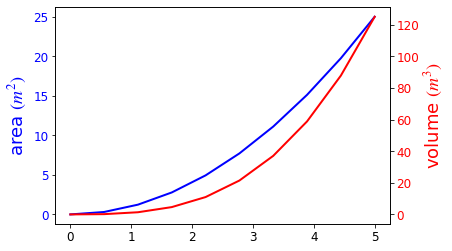

In [43]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

### Ejes donde x e y son cero

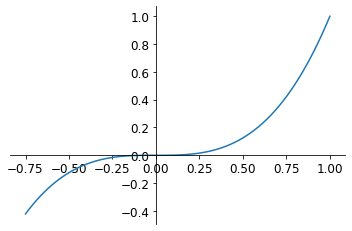

In [44]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

### Otros estilos de trama 2D

Además del método regular 'plot', hay una serie de otras funciones para generar diferentes tipos de gráficos. Consulte la galería de gráficos de matplotlib para obtener una lista completa de los tipos de gráficos disponibles: http://matplotlib.org/gallery.html. Algunos de los más útiles se muestran a continuación:

In [45]:
n = np.array([0,1,2,3,4,5])

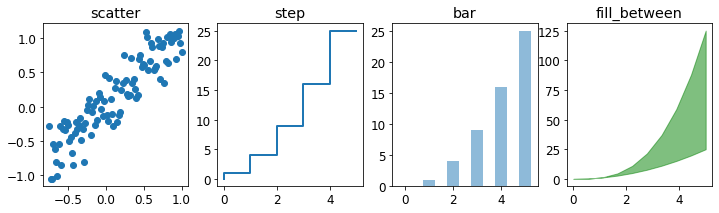

In [46]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

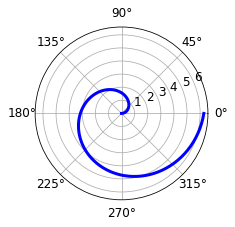

In [47]:
# polar plot using add_axes and polar projection
fig = plt.figure()
ax = fig.add_axes([0.0, 0.0, .6, .6], polar=True)
t = np.linspace(0, 2 * np.pi, 100)
ax.plot(t, t, color='blue', lw=3);

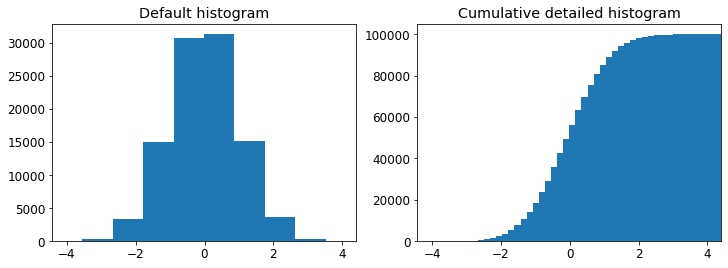

In [48]:
# A histogram
n = np.random.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n)
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((min(n), max(n)));

### Anotación de texto

La anotación de texto en las figuras de matplotlib se puede hacer usando la función `text`. Admite el formateo LaTeX al igual que los textos y títulos de etiquetas de ejes:

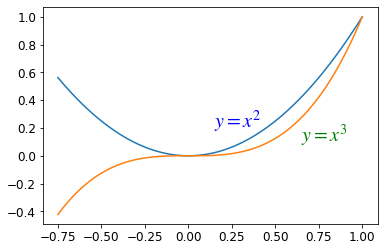

In [49]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

### Figuras con múltiples subtramas e inserciones

Los ejes se pueden agregar a un lienzo de figura de matplotlib manualmente usando `fig.add_axes` o usando un administrador de diseño de sub-figuras como` subplots`, `subplot2grid` o` gridspec`:

#### subplots

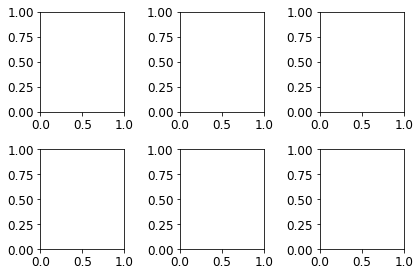

In [50]:
fig, ax = plt.subplots(2, 3)
fig.tight_layout()

#### subplot2grid

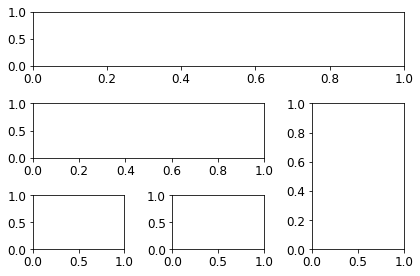

In [51]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

#### gridspec

In [52]:
import matplotlib.gridspec as gridspec

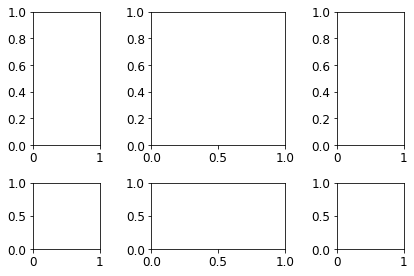

In [53]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 3, height_ratios=[2,1], width_ratios=[1,2,1])
for g in gs:
    ax = fig.add_subplot(g)
    
fig.tight_layout()

#### add_axes

La adición manual de ejes con `add_axes` es útil para agregar inserciones a las figuras:

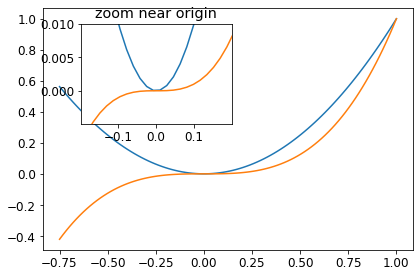

In [54]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# inset
inset_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # X, Y, width, height

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('zoom near origin')

# set axis range
inset_ax.set_xlim(-.2, .2)
inset_ax.set_ylim(-.005, .01)

# set axis tick locations
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1]);

### Figuras de colores y contornos

Los mapas de colores y las figuras de contorno son útiles para trazar funciones de dos variables. En la mayoría de estas funciones, utilizaremos un mapa de colores para codificar una dimensión de los datos. Hay una serie de mapas de color predefinidos. Es relativamente sencillo definir mapas de colores personalizados. Para obtener una lista de mapas de colores predefinidos, consulte: http://www.scipy.org/Cookbook/Matplotlib/Show_colormaps

In [55]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

In [56]:
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

#### pcolor

/tmp/ipykernel_276116/2820919165.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())


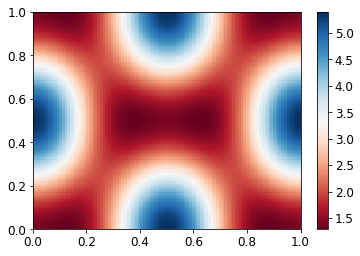

In [57]:
fig, ax = plt.subplots()

p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)

#### imshow

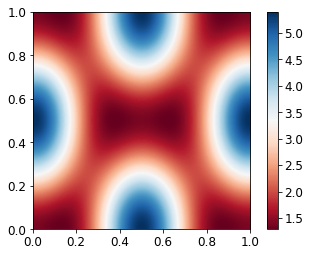

In [58]:
fig, ax = plt.subplots()

im = ax.imshow(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)

#### contour

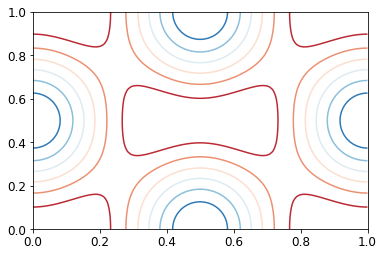

In [59]:
fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])

### figuras 3D

Para usar gráficos 3D en matplotlib, primero necesitamos crear una instancia de la clase `Axes3D`. Los ejes 3D se pueden agregar a un lienzo de figuras de matplotlib exactamente de la misma manera que los ejes 2D; o, más convenientemente, pasando un argumento de palabra clave `projection = '3d'` a los métodos` add _axes` o `add_ subplot`.

In [60]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

#### Parcelas de superficie

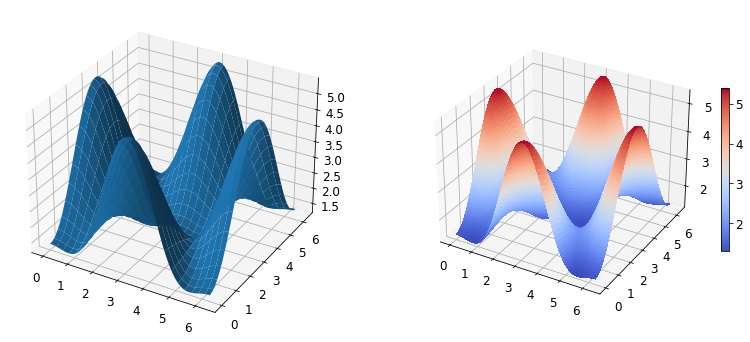

In [61]:
fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

#### Diagrama de alambre

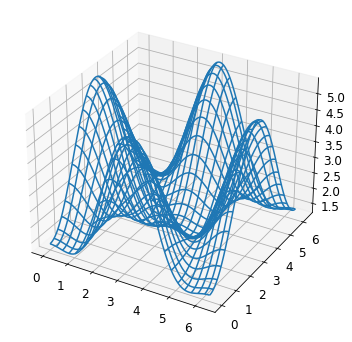

In [62]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

#### Coutour parcelas con proyecciones.

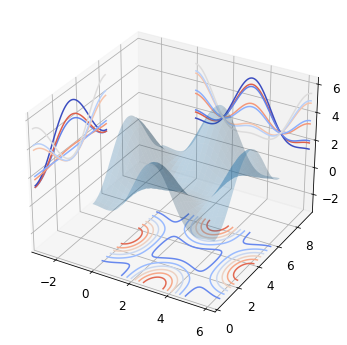

In [63]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=matplotlib.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);

#### Cambia el ángulo de visión

Podemos cambiar la perspectiva de una gráfica 3D utilizando el método `view_init`, que toma dos argumentos: ángulo de elevación y ángulo de azimut (en grados):

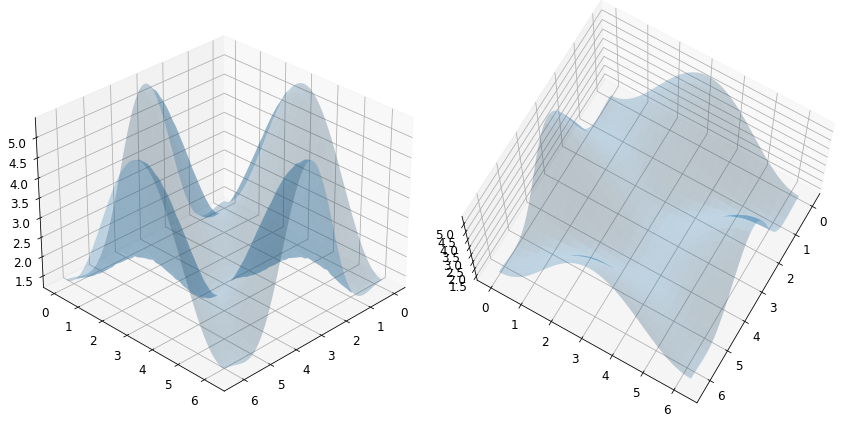

In [64]:
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(30, 45)

ax = fig.add_subplot(1,2,2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(70, 30)

fig.tight_layout()

### Backends

Matplotlib tiene una serie de "backends" que son responsables de representar gráficos. Los diferentes backends son capaces de generar gráficos con diferentes formatos y mostrar / bucles de eventos. Existe una distinción entre los backends no interactivos (como 'agg', 'svg', 'pdf', etc.) que solo se utilizan para generar archivos de imagen (por ejemplo, con la función `savefig`), y los backends interactivos (como Qt4Agg) , GTK, MaxOSX) que puede mostrar una ventana GUI para explorar figuras de forma interactiva.

Una lista de backends disponibles son:

In [65]:
print(matplotlib.rcsetup.all_backends)

['GTK3Agg', 'GTK3Cairo', 'MacOSX', 'nbAgg', 'Qt4Agg', 'Qt4Cairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']


El backend predeterminado, llamado `agg`, se basa en una biblioteca para gráficos de trama, lo cual es ideal para generar formatos raster como PNG.

Normalmente, no necesitamos preocuparnos por cambiar el backend predeterminado; pero a veces puede ser útil cambiar, por ejemplo, a PDF o GTKCairo (si está usando Linux) para producir gráficos vectoriales de alta calidad en lugar de gráficos rasterizados.

#### Generando SVG con el servidor svg

In [66]:
#
# RESTART THE NOTEBOOK: the matplotlib backend can only be selected before pylab is imported!
# (e.g. Kernel > Restart)
# 
import matplotlib
matplotlib.use('svg')
import matplotlib.pylab as plt
import numpy
from IPython.display import Image, SVG

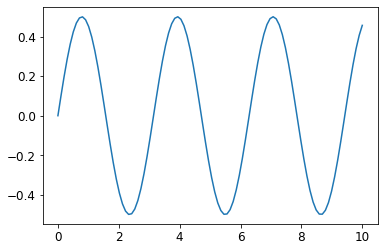

In [67]:
#
# Now we are using the svg backend to produce SVG vector graphics
#
fig, ax = plt.subplots()
t = numpy.linspace(0, 10, 100)
ax.plot(t, numpy.cos(t)*numpy.sin(t))
plt.savefig("test.svg")

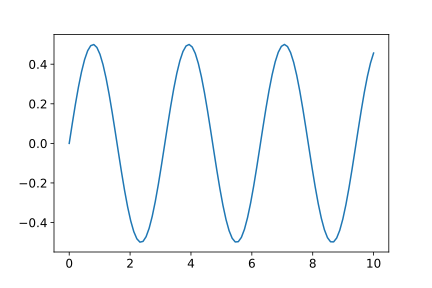

In [68]:
#
# Show the produced SVG file. 
#
SVG(filename="test.svg")

#### El backend en línea del notebook IPython

Cuando usamos la notebook IPython, es conveniente usar un backend matplotlib que genere los gráficos incrustados en el archivo de la notebook. Para activar este backend, en algún punto del principio del cuaderno, agregamos:

    %matplotlib inline

También es posible activar el trazado de matplotlib en línea con:

    %pylab inline

La diferencia es que `%pylab inline` importa una cantidad de paquetes en el espacio de direcciones global (scipy, numpy), mientras que `%matplotlib inline` solo configura el trazado en línea. En los nuevos portátiles creados para IPython 1.0+, recomendaría el uso de `%matplotlib inline`, ya que es más ordenado y tiene más control sobre qué paquetes se importan y cómo. Comúnmente, scipy y numpy se importan por separado con:

    import numpy as np
    import scipy as sp
    import matplotlib.pyplot as plt

El backend inline tiene varias opciones de configuración que pueden ser seteadas usando el comando " mágico" de IPython  `%config` para actualizae los ajustes en `InlineBackend`. Por ejemplo, se puede cambiar a SVG el formato de las figuras con:

    %config InlineBackend.figure_format='svg'
     
o:

    %config InlineBackend.figure_format='retina'
    
Para más información escriba:

    %config InlineBackend

In [69]:
%matplotlib inline
%config InlineBackend.figure_format='svg'

import matplotlib.pylab as plt
import numpy

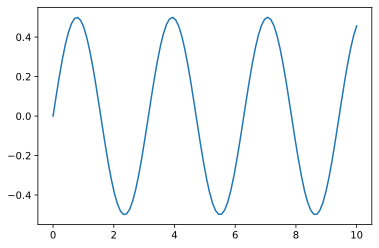

In [70]:
#
# Now we are using the SVG vector graphics displaced inline in the notebook
#
fig, ax = plt.subplots()
t = numpy.linspace(0, 10, 100)
ax.plot(t, numpy.cos(t)*numpy.sin(t))
plt.savefig("test.svg")

#### Backends interactivos (tienen más sentidos en scripts de python)

In [71]:
#
# RESTART THE NOTEBOOK: the matplotlib backend can only be selected before pylab is imported!
# (e.g. Kernel > Restart)
# 
import matplotlib
matplotlib.use('Qt5Agg') # or for example MacOSX
import matplotlib.pylab as plt
import numpy as np

In [72]:
# Now, open an interactive plot window with the Qt4Agg backend
%matplotlib qt5
fig, ax = plt.subplots()
t = np.linspace(0, 10, 100)
ax.plot(t, np.cos(t) * np.sin(t))
fig.show()

Tenga en cuenta que cuando usamos un backend interactivo, debemos llamar a `plt.show()` para hacer que la figura aparezca en la pantalla.

### Otras lecturas

* http://www.matplotlib.org - The project web page for matplotlib.
* https://github.com/matplotlib/matplotlib - The source code for matplotlib.
* http://matplotlib.org/gallery.html - A large gallery showcaseing various types of plots matplotlib can create. Highly recommended! 
* http://www.loria.fr/~rougier/teaching/matplotlib - A good matplotlib tutorial.
* http://scipy-lectures.github.io/matplotlib/matplotlib.html - Another good matplotlib reference.
